In [32]:
import pandas as pd

In [33]:
import numpy as np

In [34]:
import matplotlib.pyplot as plt

In [35]:
df=pd.read_csv('data_gratel.csv')

In [36]:
df

,Level,Role,Audiance_count,Total_days,Score
0,Beginner,INT,22,10,65
1,Advanced,EXT,30,15,88
2,Intermediate,INT,18,9,75
3,Advanced,EXT,25,14,90
4,Beginner,INT,28,7,59
...,...,...,...,...,...
695,Advanced,INT,95,77,152
696,Intermediate,EXT,65,52,122
697,Beginner,INT,75,31,104
698,Advanced,INT,96,78,153


In [37]:
missing_values_count = df['Level'].isnull().sum()
missing_values_count

0

In [38]:
missing_values_count1 = df['Role'].isnull().sum()
missing_values_count1

0

In [39]:
df.shape

(700, 5)

In [40]:
print(df.dtypes)

Level             object
Role              object
Audiance_count     int64
Total_days         int64
Score              int64
dtype: object


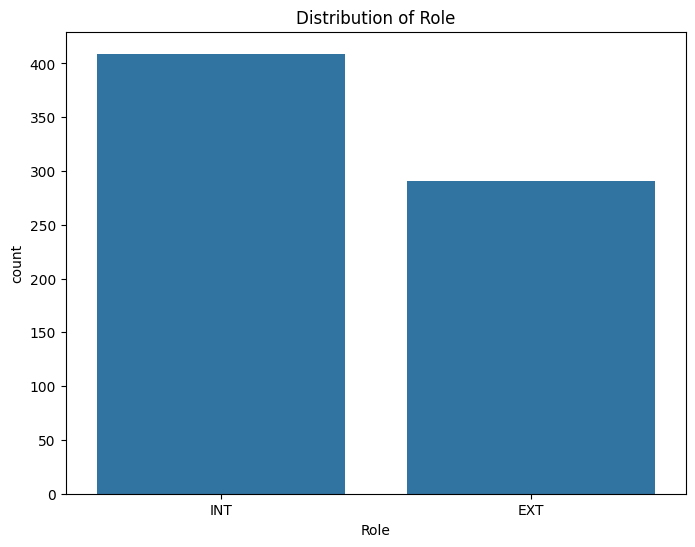

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is called df
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Role')
plt.title('Distribution of Role')
plt.show()


In [42]:
# DataFrame is called df
level_mapping = {"Beginner": 1, "Intermediate": 2, "Advanced": 3}
df["Level"] = df["Level"].map(level_mapping)


In [43]:
df

,Level,Role,Audiance_count,Total_days,Score
0,1,INT,22,10,65
1,3,EXT,30,15,88
2,2,INT,18,9,75
3,3,EXT,25,14,90
4,1,INT,28,7,59
...,...,...,...,...,...
695,3,INT,95,77,152
696,2,EXT,65,52,122
697,1,INT,75,31,104
698,3,INT,96,78,153


In [44]:
# Assuming your DataFrame is called df
role_mapping = {"INT": 1, "EXT": 2}
df["Role"] = df["Role"].map(role_mapping)


In [45]:
df

,Level,Role,Audiance_count,Total_days,Score
0,1,1,22,10,65
1,3,2,30,15,88
2,2,1,18,9,75
3,3,2,25,14,90
4,1,1,28,7,59
...,...,...,...,...,...
695,3,1,95,77,152
696,2,2,65,52,122
697,1,1,75,31,104
698,3,1,96,78,153


In [46]:
# Assuming your DataFrame is called df
df = df.drop(columns=["Score"])


In [47]:
df.head(20)

,Level,Role,Audiance_count,Total_days
0,1,1,22,10
1,3,2,30,15
2,2,1,18,9
3,3,2,25,14
4,1,1,28,7
5,2,2,20,11
6,1,1,24,8
7,3,2,32,13
8,2,1,26,10
9,1,2,23,9


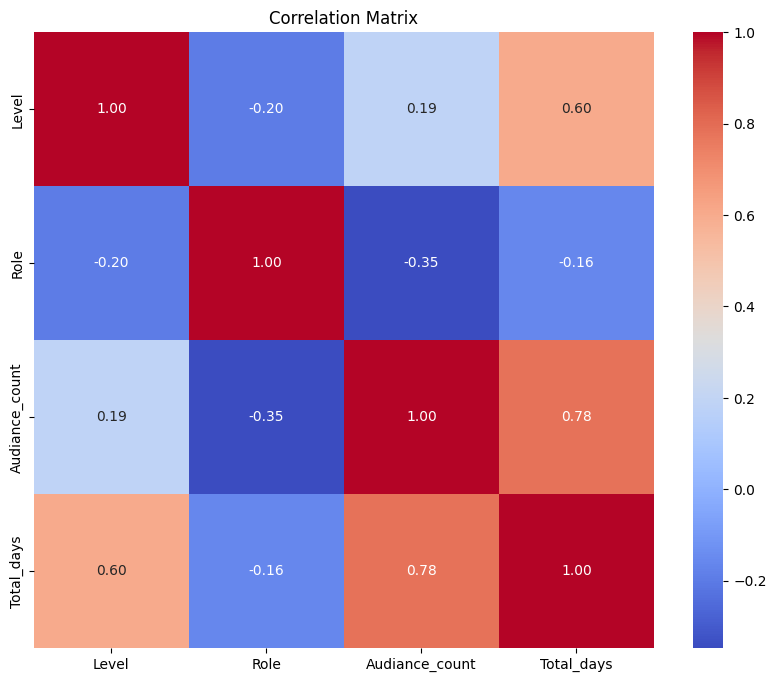

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is called df
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [49]:
df

,Level,Role,Audiance_count,Total_days
0,1,1,22,10
1,3,2,30,15
2,2,1,18,9
3,3,2,25,14
4,1,1,28,7
...,...,...,...,...
695,3,1,95,77
696,2,2,65,52
697,1,1,75,31
698,3,1,96,78


In [50]:
df['Role'].value_counts()

Role
1    409
2    291
Name: count, dtype: int64

In [51]:
df

,Level,Role,Audiance_count,Total_days
0,1,1,22,10
1,3,2,30,15
2,2,1,18,9
3,3,2,25,14
4,1,1,28,7
...,...,...,...,...
695,3,1,95,77
696,2,2,65,52
697,1,1,75,31
698,3,1,96,78


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, HuberRegressor, PassiveAggressiveRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

def train_regression_model(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    return rmse, r2

# Assuming 'df' is your DataFrame containing the data
X = df[['Level', 'Role', 'Audiance_count']]  # Features
y = df['Total_days']  # Target variable

# List of all regression models
all_models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Bayesian Ridge Regression": BayesianRidge(),
    "Huber Regressor": HuberRegressor(),
    "Passive Aggressive Regressor": PassiveAggressiveRegressor(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Extra Tree Regressor": ExtraTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "Histogram Gradient Boosting Regressor": HistGradientBoostingRegressor(),
    "Support Vector Regression": SVR(),
    "K-Neighbors Regression": KNeighborsRegressor()
}

# Train and evaluate all models
for name, model in all_models.items():
    rmse, r2 = train_regression_model(model, X, y)
    print(f"{name} - RMSE: {rmse}, R2 Score: {r2}")


C:\Users\SumitKumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\SumitKumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\SumitKumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\SumitKumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.

Linear Regression - RMSE: 5.3018260043811924, R2 Score: 0.8628026406299376
Ridge Regression - RMSE: 5.298151947975457, R2 Score: 0.8629927246429793
Lasso Regression - RMSE: 5.730015394898302, R2 Score: 0.8397469188572049
ElasticNet Regression - RMSE: 6.478623458392065, R2 Score: 0.795138527891449
Bayesian Ridge Regression - RMSE: 5.29917653448952, R2 Score: 0.8629397290394667
Huber Regressor - RMSE: 5.376699696834557, R2 Score: 0.8589002084949473
Passive Aggressive Regressor - RMSE: 7.752651256591442, R2 Score: 0.7066437757989776
Decision Tree Regression - RMSE: 1.3783688888141643, R2 Score: 0.9907268830949634
Extra Tree Regressor - RMSE: 1.3938285176118104, R2 Score: 0.9905177041224306


C:\Users\SumitKumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\SumitKumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\SumitKumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest Regression - RMSE: 1.3915044938690337, R2 Score: 0.9905492986959755
AdaBoost Regressor - RMSE: 3.3746822120377953, R2 Score: 0.9444146204567103
Gradient Boosting Regressor - RMSE: 1.8111386400557543, R2 Score: 0.983989746694061
Histogram Gradient Boosting Regressor - RMSE: 1.940006527831306, R2 Score: 0.9816303368206414
Support Vector Regression - RMSE: 9.73108714583489, R2 Score: 0.5378132036803727
K-Neighbors Regression - RMSE: 4.480752487824211, R2 Score: 0.9020066240007969


C:\Users\SumitKumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\SumitKumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\SumitKumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Assuming 'df' is your DataFrame containing the data
X = df[['Level', 'Role', 'Audiance_count']]  # Features
y = df['Total_days']  # Target variable
# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regression
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_rmse = mean_squared_error(y_test, dt_pred, squared=False)
print("Decision Tree Regression RMSE:", dt_rmse)

dt_r2 = r2_score(y_test, dt_pred)
print("Decision Tree Regression R2 Score:", dt_r2)

Decision Tree Regression RMSE: 1.3783688888141643
Decision Tree Regression R2 Score: 0.9907268830949634


C:\Users\SumitKumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
